In [71]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from keras.callbacks import History 

history = History()

# Make numpy printouts easier to read.
np.set_printoptions(precision=3, suppress=True)

In [17]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
                'Acceleration', 'Model Year', 'Origin']

dataset = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)
#reading data, naming the columns, replacing "?" with NaN and removing the name of the car.

#data = pd.read_fwf('./../../Downloads/auto-mpg.data', delimiter = " ")


In [18]:
print(dataset)
#print(data)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [19]:
dataset.isna().sum()
dataset = dataset.dropna()
#Cleaning the data by removing the "NaN" values
print(dataset)

      MPG  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0  2790.0          15.6   
394  44.0          4          97.0        52.0  2130.0          24.6   
395  32.0          4         135.0        84.0  2295.0          11.6   
396  28.0          4         120.0        79.0  2625.0          18.6   
397  31.0          4         119.0        82.0  2720.0          19.4   

     Model Year  Origin  
0            70       1  
1            70       1  
2            70       1  
3            70       1  
4    

In [20]:
dataset['Origin'] = dataset['Origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})
dataset.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [21]:
dataset = pd.get_dummies(dataset, prefix='', prefix_sep='')
dataset.tail()
#Changing the categorical parameter into a numerical parameter

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Europe,Japan,USA
393,27.0,4,140.0,86.0,2790.0,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,0,0,1
397,31.0,4,119.0,82.0,2720.0,19.4,82,0,0,1


In [22]:
train_dataset = dataset.sample(frac = 0.8, random_state = 69)
test_dataset = dataset.drop(train_dataset.index)
print(len(train_dataset), len(test_dataset))

314 78


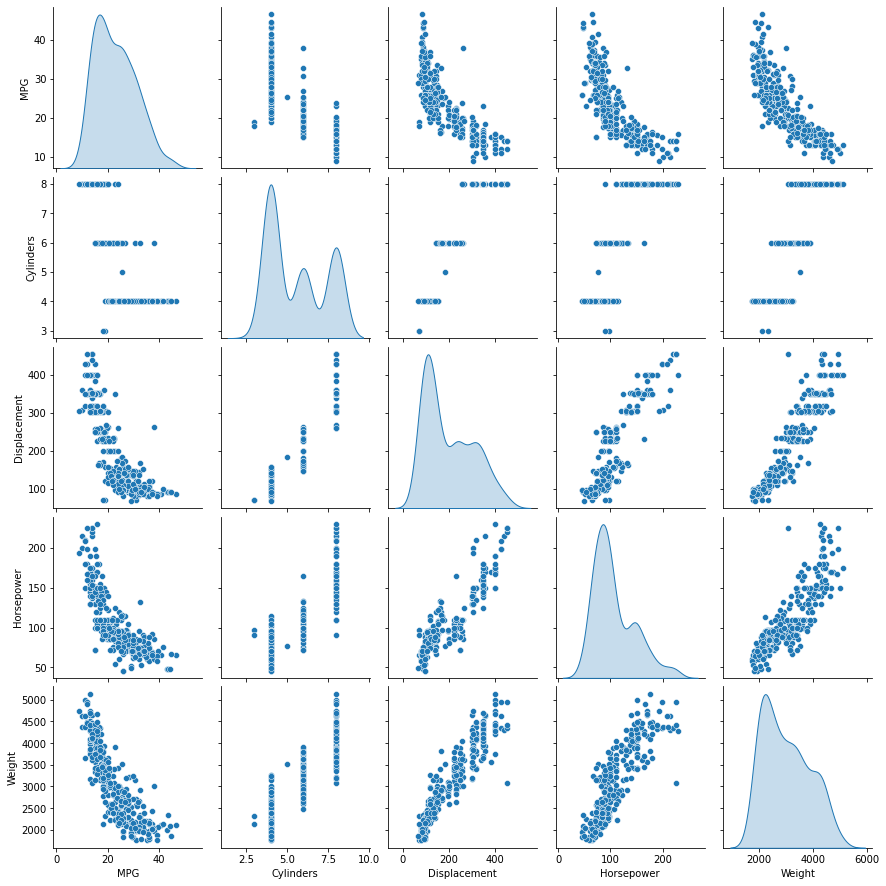

In [28]:
#Data inspection and plotting 
#We are investigating the MPG of a vehicle. We plot graphs to observe the relationship among "features".
sns.pairplot(train_dataset[['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight']], diag_kind='kde')
# <3 seaborn

In [36]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MPG,314.0,23.037261,7.847821,9.0,16.500,22.0,29.0,46.6
Cylinders,314.0,5.582803,1.725904,3.0,4.000,6.0,8.0,8.0
Displacement,314.0,200.584395,105.512276,68.0,107.000,156.0,302.0,455.0
Horsepower,314.0,106.417197,39.620014,46.0,76.000,95.0,131.5,230.0
Weight,314.0,3026.098726,857.700403,1755.0,2248.000,2902.5,3670.0,5140.0
Acceleration,314.0,15.461783,2.773437,8.0,13.525,15.5,17.0,24.8
Model Year,314.0,75.856688,3.683376,70.0,73.000,76.0,79.0,82.0
Europe,314.0,0.168790,0.375164,0.0,0.000,0.0,0.0,1.0
Japan,314.0,0.187898,0.391254,0.0,0.000,0.0,0.0,1.0
USA,314.0,0.643312,0.479786,0.0,0.000,1.0,1.0,1.0


In [32]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('MPG')
test_labels = test_features.pop('MPG')
#Removing the MPG label from our dataset as that is what we would like to predict.

In [41]:
#Feature normalization

normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(train_features))
#print(normalizer.mean.numpy())

feature_vec = np.array(train_features[:1])

print('First example:', feature_vec)
print('Normalized:', normalizer(feature_vec).numpy())

First example: [[   4.  113.   95. 2228.   14.   71.    0.    1.    0.]]
Normalized: [[-0.919 -0.831 -0.289 -0.932 -0.528 -1.321 -0.451  2.079 -1.343]]


In [94]:
#Predicting MPG from just horsepower (one feature)
horsepower_vec = np.array(train_features['Horsepower'])

horsepower_normalizer = preprocessing.Normalization(input_shape=[1,])
horsepower_normalizer.adapt(horsepower_vec)
horsepower_model = tf.keras.Sequential([
    horsepower_normalizer,
    layers.Dense(units=1, use_bias = 'True')#, activation = 'sigmoid', use_bias = 'True')
])

horsepower_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_13 (Normalizat (None, 1)                 3         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 2         
Total params: 5
Trainable params: 2
Non-trainable params: 3
_________________________________________________________________


In [95]:
horsepower_model.predict(horsepower_vec[:10])
horsepower_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss = 'mean_absolute_error')
#%%time 'MeanSquaredError'
history_with_bias_lr = horsepower_model.fit(train_features['Horsepower'], train_labels, validation_split = 0.2, epochs = 1000)

Epoch 1/1000
8/8 [==============================] - 0s 12ms/step - loss: 22.7574 - val_loss: 23.3398
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 23.2176 - val_loss: 23.2597
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.3601 - val_loss: 23.1798
Epoch 4/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.1335 - val_loss: 23.1001
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 23.3146 - val_loss: 23.0200
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.3415 - val_loss: 22.9401
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.2775 - val_loss: 22.8600
Epoch 8/1000
8/8 [==============================] - 0s 5ms/step - loss: 22.4099 - val_loss: 22.7801
Epoch 9/1000
8/8 [==============================] - 0s 4ms/step - loss: 21.8219 - val_loss: 22.7002
Epoch 10/1000
8/8 [==============================] - 0s 5ms/step - loss: 22.0417 - val_loss: 22.620

Epoch 75/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.9565 - val_loss: 17.4311
Epoch 76/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.9508 - val_loss: 17.3519
Epoch 77/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.9992 - val_loss: 17.2724
Epoch 78/1000
8/8 [==============================] - 0s 3ms/step - loss: 17.0420 - val_loss: 17.1930
Epoch 79/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.5610 - val_loss: 17.1136
Epoch 80/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.9763 - val_loss: 17.0345
Epoch 81/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.3026 - val_loss: 16.9555
Epoch 82/1000
8/8 [==============================] - 0s 3ms/step - loss: 16.8918 - val_loss: 16.8764
Epoch 83/1000
8/8 [==============================] - 0s 3ms/step - loss: 15.7639 - val_loss: 16.7976
Epoch 84/1000
8/8 [==============================] - 0s 3ms/step - loss: 17.2076 - val_loss

8/8 [==============================] - 0s 3ms/step - loss: 11.0363 - val_loss: 11.0932
Epoch 156/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.7416 - val_loss: 11.0141
Epoch 157/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.3607 - val_loss: 10.9344
Epoch 158/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.9557 - val_loss: 10.8558
Epoch 159/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.5437 - val_loss: 10.7769
Epoch 160/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.8376 - val_loss: 10.6978
Epoch 161/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.3367 - val_loss: 10.6186
Epoch 162/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.2105 - val_loss: 10.5398
Epoch 163/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.0060 - val_loss: 10.4610
Epoch 164/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.0860 - val_loss: 10.

Epoch 237/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.1373 - val_loss: 5.7926
Epoch 238/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.1152 - val_loss: 5.7581
Epoch 239/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.5866 - val_loss: 5.7230
Epoch 240/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.2080 - val_loss: 5.6879
Epoch 241/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.9108 - val_loss: 5.6538
Epoch 242/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.6114 - val_loss: 5.6215
Epoch 243/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.1195 - val_loss: 5.5910
Epoch 244/1000
8/8 [==============================] - 0s 3ms/step - loss: 5.1257 - val_loss: 5.5630
Epoch 245/1000
8/8 [==============================] - 0s 4ms/step - loss: 5.0997 - val_loss: 5.5352
Epoch 246/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.7594 - val_loss: 5.5085


Epoch 319/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7336 - val_loss: 4.6960
Epoch 320/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6384 - val_loss: 4.6944
Epoch 321/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7149 - val_loss: 4.6918
Epoch 322/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6894 - val_loss: 4.6889
Epoch 323/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9107 - val_loss: 4.6860
Epoch 324/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6802 - val_loss: 4.6847
Epoch 325/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6382 - val_loss: 4.6823
Epoch 326/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6816 - val_loss: 4.6804
Epoch 327/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7604 - val_loss: 4.6794
Epoch 328/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7928 - val_loss: 4.6773


Epoch 401/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9314 - val_loss: 4.6212
Epoch 402/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8168 - val_loss: 4.6224
Epoch 403/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6935 - val_loss: 4.6223
Epoch 404/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.6370 - val_loss: 4.6222
Epoch 405/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6576 - val_loss: 4.6217
Epoch 406/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6092 - val_loss: 4.6208
Epoch 407/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7313 - val_loss: 4.6221
Epoch 408/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8975 - val_loss: 4.6227
Epoch 409/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5894 - val_loss: 4.6216
Epoch 410/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7730 - val_loss: 4.6214


Epoch 483/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.4653 - val_loss: 4.6184
Epoch 484/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9858 - val_loss: 4.6190
Epoch 485/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7517 - val_loss: 4.6189
Epoch 486/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7573 - val_loss: 4.6180
Epoch 487/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.3974 - val_loss: 4.6184
Epoch 488/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8167 - val_loss: 4.6188
Epoch 489/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5314 - val_loss: 4.6191
Epoch 490/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6886 - val_loss: 4.6197
Epoch 491/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6378 - val_loss: 4.6192
Epoch 492/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5626 - val_loss: 4.6190


Epoch 565/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.7544 - val_loss: 4.6194
Epoch 566/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5259 - val_loss: 4.6193
Epoch 567/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.6535 - val_loss: 4.6194
Epoch 568/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.9194 - val_loss: 4.6190
Epoch 569/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.4232 - val_loss: 4.6192
Epoch 570/1000
8/8 [==============================] - 0s 5ms/step - loss: 3.6329 - val_loss: 4.6192
Epoch 571/1000
8/8 [==============================] - 0s 6ms/step - loss: 3.7704 - val_loss: 4.6207
Epoch 572/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.7149 - val_loss: 4.6195
Epoch 573/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.8143 - val_loss: 4.6188
Epoch 574/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.7622 - val_loss: 4.6182


Epoch 647/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.4779 - val_loss: 4.6198
Epoch 648/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5094 - val_loss: 4.6189
Epoch 649/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.3839 - val_loss: 4.6175
Epoch 650/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7784 - val_loss: 4.6180
Epoch 651/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9745 - val_loss: 4.6182
Epoch 652/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6386 - val_loss: 4.6185
Epoch 653/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5090 - val_loss: 4.6190
Epoch 654/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5918 - val_loss: 4.6199
Epoch 655/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8086 - val_loss: 4.6198
Epoch 656/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7091 - val_loss: 4.6197


Epoch 729/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5538 - val_loss: 4.6201
Epoch 730/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.7165 - val_loss: 4.6183
Epoch 731/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.6087 - val_loss: 4.6183
Epoch 732/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.6553 - val_loss: 4.6189
Epoch 733/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.9181 - val_loss: 4.6192
Epoch 734/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5393 - val_loss: 4.6200
Epoch 735/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5188 - val_loss: 4.6193
Epoch 736/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.5903 - val_loss: 4.6187
Epoch 737/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6091 - val_loss: 4.6194
Epoch 738/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.4074 - val_loss: 4.6188


Epoch 811/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5670 - val_loss: 4.6189
Epoch 812/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8070 - val_loss: 4.6188
Epoch 813/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.4953 - val_loss: 4.6185
Epoch 814/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7294 - val_loss: 4.6184
Epoch 815/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8496 - val_loss: 4.6179
Epoch 816/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8932 - val_loss: 4.6184
Epoch 817/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6922 - val_loss: 4.6191
Epoch 818/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8729 - val_loss: 4.6192
Epoch 819/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6241 - val_loss: 4.6200
Epoch 820/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.7172 - val_loss: 4.6192


Epoch 893/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.3239 - val_loss: 4.6178
Epoch 894/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5975 - val_loss: 4.6170
Epoch 895/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5988 - val_loss: 4.6187
Epoch 896/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6093 - val_loss: 4.6188
Epoch 897/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6244 - val_loss: 4.6189
Epoch 898/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8277 - val_loss: 4.6198
Epoch 899/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6089 - val_loss: 4.6210
Epoch 900/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7485 - val_loss: 4.6193
Epoch 901/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.9184 - val_loss: 4.6194
Epoch 902/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8530 - val_loss: 4.6186


Epoch 975/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.5832 - val_loss: 4.6193
Epoch 976/1000
8/8 [==============================] - 0s 4ms/step - loss: 3.8142 - val_loss: 4.6195
Epoch 977/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.4786 - val_loss: 4.6213
Epoch 978/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7697 - val_loss: 4.6192
Epoch 979/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8624 - val_loss: 4.6179
Epoch 980/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6640 - val_loss: 4.6178
Epoch 981/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.6628 - val_loss: 4.6184
Epoch 982/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7020 - val_loss: 4.6184
Epoch 983/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.7778 - val_loss: 4.6191
Epoch 984/1000
8/8 [==============================] - 0s 3ms/step - loss: 3.8036 - val_loss: 4.6189


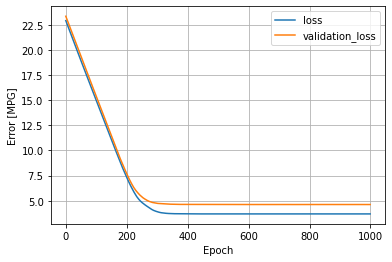

In [99]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='validation_loss')
    #plt.ylim([0, 10])
    plt.xlabel('Epoch')
    plt.ylabel('Error [MPG]')
    plt.legend()
    plt.grid(True)
    
#print(history.history.keys())   
#print(history.history['loss'])
#plot_loss(history)
#plot_loss(history_with_bias)
plot_loss(history_with_bias_lr)


In [134]:
test_results = {}

test_results['horsepower_model'] = horsepower_model.evaluate(test_features['Horsepower'], test_labels, verbose = 0)
#Running our model on test data and storing results.

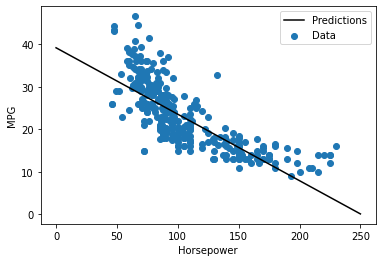

In [97]:
def plot_horsepower(x, y):
    plt.scatter(train_features['Horsepower'], train_labels, label='Data')
    plt.plot(x, y, color='k', label='Predictions')
    plt.xlabel('Horsepower')
    plt.ylabel('MPG')
    plt.legend()
x = tf.linspace(0.0, 250, 251)
y = horsepower_model.predict(x)
plot_horsepower(x,y)


In [101]:
#For multiple features
linear_model = tf.keras.Sequential([normalizer,layers.Dense(units=1, use_bias = 'True')])
#Note that there is no activation in our last layer as we're performing regression!
#No 'hidden' layers as it's LINEAR regression (activation functions in hidden layers introduce non linearity)
linear_model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    loss='mean_absolute_error')
#%%time
history = linear_model.fit(train_features, train_labels, epochs=1000, verbose = 1, validation_split = 0.2)

Epoch 1/1000
8/8 [==============================] - 0s 12ms/step - loss: 23.2953 - val_loss: 23.4693
Epoch 2/1000
8/8 [==============================] - 0s 3ms/step - loss: 22.9722 - val_loss: 23.3993
Epoch 3/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.1349 - val_loss: 23.3307
Epoch 4/1000
8/8 [==============================] - 0s 3ms/step - loss: 22.5145 - val_loss: 23.2579
Epoch 5/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.1350 - val_loss: 23.1904
Epoch 6/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.4689 - val_loss: 23.1199
Epoch 7/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.1407 - val_loss: 23.0487
Epoch 8/1000
8/8 [==============================] - 0s 4ms/step - loss: 22.6600 - val_loss: 22.9773
Epoch 9/1000
8/8 [==============================] - 0s 3ms/step - loss: 22.2347 - val_loss: 22.9076
Epoch 10/1000
8/8 [==============================] - 0s 4ms/step - loss: 21.9536 - val_loss: 22.838

8/8 [==============================] - 0s 4ms/step - loss: 16.4120 - val_loss: 17.6958
Epoch 83/1000
8/8 [==============================] - 0s 4ms/step - loss: 15.6815 - val_loss: 17.6221
Epoch 84/1000
8/8 [==============================] - 0s 4ms/step - loss: 15.0712 - val_loss: 17.5498
Epoch 85/1000
8/8 [==============================] - 0s 4ms/step - loss: 16.1730 - val_loss: 17.4734
Epoch 86/1000
8/8 [==============================] - 0s 4ms/step - loss: 15.1236 - val_loss: 17.4011
Epoch 87/1000
8/8 [==============================] - 0s 3ms/step - loss: 15.7868 - val_loss: 17.3265
Epoch 88/1000
8/8 [==============================] - 0s 4ms/step - loss: 15.4353 - val_loss: 17.2519
Epoch 89/1000
8/8 [==============================] - 0s 4ms/step - loss: 16.3942 - val_loss: 17.1742
Epoch 90/1000
8/8 [==============================] - 0s 4ms/step - loss: 16.6001 - val_loss: 17.0982
Epoch 91/1000
8/8 [==============================] - 0s 4ms/step - loss: 14.7906 - val_loss: 17.0290
Epoc

8/8 [==============================] - 0s 3ms/step - loss: 10.4703 - val_loss: 11.5174
Epoch 163/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.7392 - val_loss: 11.4366
Epoch 164/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.5579 - val_loss: 11.3534
Epoch 165/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.7996 - val_loss: 11.2735
Epoch 166/1000
8/8 [==============================] - 0s 3ms/step - loss: 10.4485 - val_loss: 11.1901
Epoch 167/1000
8/8 [==============================] - 0s 4ms/step - loss: 9.5618 - val_loss: 11.1106
Epoch 168/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.7527 - val_loss: 11.0271
Epoch 169/1000
8/8 [==============================] - 0s 4ms/step - loss: 9.3678 - val_loss: 10.9446
Epoch 170/1000
8/8 [==============================] - 0s 4ms/step - loss: 10.1134 - val_loss: 10.8624
Epoch 171/1000
8/8 [==============================] - 0s 3ms/step - loss: 9.2502 - val_loss: 10.7809
E

Epoch 244/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.2259 - val_loss: 5.1375
Epoch 245/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.7146 - val_loss: 5.0768
Epoch 246/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.5943 - val_loss: 5.0246
Epoch 247/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.6733 - val_loss: 4.9718
Epoch 248/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.2681 - val_loss: 4.9108
Epoch 249/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.3756 - val_loss: 4.8482
Epoch 250/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0523 - val_loss: 4.7961
Epoch 251/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.2825 - val_loss: 4.7383
Epoch 252/1000
8/8 [==============================] - 0s 4ms/step - loss: 4.0028 - val_loss: 4.6791
Epoch 253/1000
8/8 [==============================] - 0s 3ms/step - loss: 4.0055 - val_loss: 4.6286


Epoch 326/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4323 - val_loss: 2.9513
Epoch 327/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2709 - val_loss: 2.9468
Epoch 328/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3272 - val_loss: 2.9489
Epoch 329/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3328 - val_loss: 2.9474
Epoch 330/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0882 - val_loss: 2.9385
Epoch 331/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2905 - val_loss: 2.9381
Epoch 332/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.3520 - val_loss: 2.9411
Epoch 333/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4407 - val_loss: 2.9372
Epoch 334/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3535 - val_loss: 2.9370
Epoch 335/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5089 - val_loss: 2.9329


Epoch 408/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.3330 - val_loss: 2.9072
Epoch 409/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4731 - val_loss: 2.9042
Epoch 410/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0498 - val_loss: 2.9031
Epoch 411/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3829 - val_loss: 2.9142
Epoch 412/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2491 - val_loss: 2.9167
Epoch 413/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3051 - val_loss: 2.9104
Epoch 414/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4435 - val_loss: 2.9123
Epoch 415/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2071 - val_loss: 2.9078
Epoch 416/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4010 - val_loss: 2.9115
Epoch 417/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3112 - val_loss: 2.9155


Epoch 490/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2768 - val_loss: 2.9096
Epoch 491/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2961 - val_loss: 2.9139
Epoch 492/1000
8/8 [==============================] - 0s 8ms/step - loss: 2.1836 - val_loss: 2.9163
Epoch 493/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2881 - val_loss: 2.9203
Epoch 494/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.1504 - val_loss: 2.9126
Epoch 495/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2842 - val_loss: 2.9160
Epoch 496/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2962 - val_loss: 2.9101
Epoch 497/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2482 - val_loss: 2.9114
Epoch 498/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5200 - val_loss: 2.9148
Epoch 499/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2357 - val_loss: 2.9144


Epoch 572/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.3152 - val_loss: 2.9176
Epoch 573/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4126 - val_loss: 2.9286
Epoch 574/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3509 - val_loss: 2.9366
Epoch 575/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2633 - val_loss: 2.9205
Epoch 576/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.3585 - val_loss: 2.9211
Epoch 577/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.0990 - val_loss: 2.9211
Epoch 578/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3175 - val_loss: 2.9260
Epoch 579/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3967 - val_loss: 2.9282
Epoch 580/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4552 - val_loss: 2.9263
Epoch 581/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3475 - val_loss: 2.9193


Epoch 654/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1962 - val_loss: 2.9327
Epoch 655/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3060 - val_loss: 2.9332
Epoch 656/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2179 - val_loss: 2.9282
Epoch 657/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3155 - val_loss: 2.9277
Epoch 658/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2760 - val_loss: 2.9347
Epoch 659/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3245 - val_loss: 2.9315
Epoch 660/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4296 - val_loss: 2.9320
Epoch 661/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1606 - val_loss: 2.9287
Epoch 662/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2392 - val_loss: 2.9271
Epoch 663/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1617 - val_loss: 2.9359


Epoch 736/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1734 - val_loss: 2.9398
Epoch 737/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1056 - val_loss: 2.9287
Epoch 738/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1541 - val_loss: 2.9313
Epoch 739/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1289 - val_loss: 2.9372
Epoch 740/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4270 - val_loss: 2.9410
Epoch 741/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5358 - val_loss: 2.9408
Epoch 742/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1804 - val_loss: 2.9315
Epoch 743/1000
8/8 [==============================] - 0s 4ms/step - loss: 2.2942 - val_loss: 2.9302
Epoch 744/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4276 - val_loss: 2.9332
Epoch 745/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1887 - val_loss: 2.9354


Epoch 818/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1068 - val_loss: 2.9418
Epoch 819/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2032 - val_loss: 2.9386
Epoch 820/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2035 - val_loss: 2.9337
Epoch 821/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1571 - val_loss: 2.9348
Epoch 822/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1939 - val_loss: 2.9486
Epoch 823/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4315 - val_loss: 2.9430
Epoch 824/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1277 - val_loss: 2.9467
Epoch 825/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2150 - val_loss: 2.9408
Epoch 826/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1917 - val_loss: 2.9381
Epoch 827/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2349 - val_loss: 2.9440


Epoch 900/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2919 - val_loss: 2.9425
Epoch 901/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.5227 - val_loss: 2.9373
Epoch 902/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2540 - val_loss: 2.9436
Epoch 903/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2541 - val_loss: 2.9386
Epoch 904/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3203 - val_loss: 2.9413
Epoch 905/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3006 - val_loss: 2.9411
Epoch 906/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4383 - val_loss: 2.9368
Epoch 907/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3360 - val_loss: 2.9410
Epoch 908/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2862 - val_loss: 2.9426
Epoch 909/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3998 - val_loss: 2.9355


Epoch 982/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2631 - val_loss: 2.9465
Epoch 983/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2760 - val_loss: 2.9492
Epoch 984/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2538 - val_loss: 2.9490
Epoch 985/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3612 - val_loss: 2.9505
Epoch 986/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2534 - val_loss: 2.9565
Epoch 987/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4147 - val_loss: 2.9502
Epoch 988/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.3656 - val_loss: 2.9516
Epoch 989/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.1402 - val_loss: 2.9457
Epoch 990/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.4505 - val_loss: 2.9444
Epoch 991/1000
8/8 [==============================] - 0s 3ms/step - loss: 2.2139 - val_loss: 2.9541


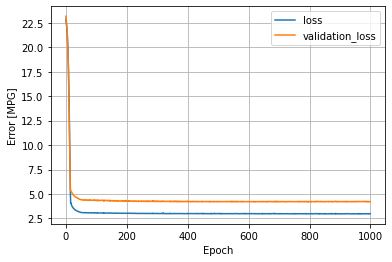

In [136]:
plot_loss(history)
test_results['linear_model'] = linear_model.evaluate(test_features, test_labels, verbose = 0)

In [141]:
#A non-linear regressor

def create_model(normalization, ip):
    model = keras.Sequential([
          normalization,
          layers.Input(shape=(ip,)),
          layers.Dense(units = 64, activation='relu', use_bias = 'True'),
          layers.Dense(units = 64, activation='relu', use_bias = 'True'),
          layers.Dense(units = 1, use_bias = 'True')
    ])

    model.compile(loss='mean_absolute_error', optimizer=tf.keras.optimizers.Adam(0.001))
    return model
    
non_linear_horsepower_regressor = create_model(horsepower_normalizer, 1)
#Single input non-linear regression
non_linear_regressor = create_model(normalizer, 9)
#Multi-input non-linear regression
non_linear_horsepower_regressor.summary()
non_linear_regressor.summary()
#Note that the difference in non-trainable parameters arises from the normalization layer.

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
normalization_13 (Normalizat (None, 1)                 3         
_________________________________________________________________
input_7 (InputLayer)         multiple                  0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                128       
_________________________________________________________________
dense_69 (Dense)             (None, 64)                4160      
_________________________________________________________________
dense_70 (Dense)             (None, 1)                 65        
Total params: 4,356
Trainable params: 4,353
Non-trainable params: 3
_________________________________________________________________
Model: "sequential_29"
_________________________________________________________________
Layer (type)                

In [142]:
#%%time
history_horsepower_regression = non_linear_horsepower_regressor.fit(train_features['Horsepower'], train_labels, validation_split = 0.2, verbose = 1, epochs = 500)

Epoch 1/500
8/8 [==============================] - 0s 13ms/step - loss: 22.7388 - val_loss: 23.0688
Epoch 2/500
8/8 [==============================] - 0s 4ms/step - loss: 22.1286 - val_loss: 22.7435
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 22.3640 - val_loss: 22.3811
Epoch 4/500
8/8 [==============================] - 0s 3ms/step - loss: 22.5481 - val_loss: 21.9338
Epoch 5/500
8/8 [==============================] - 0s 4ms/step - loss: 21.1067 - val_loss: 21.3786
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 21.1107 - val_loss: 20.6799
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 20.0933 - val_loss: 19.7975
Epoch 8/500
8/8 [==============================] - 0s 3ms/step - loss: 19.5056 - val_loss: 18.6823
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 18.2722 - val_loss: 17.2872
Epoch 10/500
8/8 [==============================] - 0s 4ms/step - loss: 16.5715 - val_loss: 15.6911
Epoch 11

8/8 [==============================] - 0s 3ms/step - loss: 3.0388 - val_loss: 4.3651
Epoch 85/500
8/8 [==============================] - 0s 4ms/step - loss: 3.3413 - val_loss: 4.3758
Epoch 86/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9231 - val_loss: 4.3860
Epoch 87/500
8/8 [==============================] - 0s 3ms/step - loss: 3.1163 - val_loss: 4.3361
Epoch 88/500
8/8 [==============================] - 0s 3ms/step - loss: 3.1192 - val_loss: 4.3755
Epoch 89/500
8/8 [==============================] - 0s 4ms/step - loss: 2.9660 - val_loss: 4.3671
Epoch 90/500
8/8 [==============================] - 0s 3ms/step - loss: 3.3188 - val_loss: 4.3587
Epoch 91/500
8/8 [==============================] - 0s 3ms/step - loss: 3.1201 - val_loss: 4.3870
Epoch 92/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9982 - val_loss: 4.3518
Epoch 93/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9871 - val_loss: 4.3549
Epoch 94/500
8/8 [===============

8/8 [==============================] - 0s 3ms/step - loss: 3.1548 - val_loss: 4.3395
Epoch 168/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0695 - val_loss: 4.3862
Epoch 169/500
8/8 [==============================] - 0s 3ms/step - loss: 2.7550 - val_loss: 4.3461
Epoch 170/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0290 - val_loss: 4.2737
Epoch 171/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0968 - val_loss: 4.2857
Epoch 172/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0129 - val_loss: 4.3520
Epoch 173/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9022 - val_loss: 4.3383
Epoch 174/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0461 - val_loss: 4.3171
Epoch 175/500
8/8 [==============================] - 0s 3ms/step - loss: 2.8359 - val_loss: 4.3054
Epoch 176/500
8/8 [==============================] - 0s 3ms/step - loss: 3.1172 - val_loss: 4.3264
Epoch 177/500
8/8 [=====

Epoch 250/500
8/8 [==============================] - 0s 3ms/step - loss: 2.8046 - val_loss: 4.3048
Epoch 251/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0005 - val_loss: 4.2504
Epoch 252/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9142 - val_loss: 4.2687
Epoch 253/500
8/8 [==============================] - 0s 4ms/step - loss: 3.1664 - val_loss: 4.2559
Epoch 254/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9906 - val_loss: 4.2690
Epoch 255/500
8/8 [==============================] - 0s 3ms/step - loss: 3.1658 - val_loss: 4.2761
Epoch 256/500
8/8 [==============================] - 0s 3ms/step - loss: 3.1958 - val_loss: 4.2781
Epoch 257/500
8/8 [==============================] - 0s 3ms/step - loss: 2.8869 - val_loss: 4.2709
Epoch 258/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0164 - val_loss: 4.3104
Epoch 259/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0541 - val_loss: 4.2815
Epoch 260/

8/8 [==============================] - 0s 4ms/step - loss: 3.1080 - val_loss: 4.2339
Epoch 333/500
8/8 [==============================] - 0s 4ms/step - loss: 3.1780 - val_loss: 4.2569
Epoch 334/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0683 - val_loss: 4.2742
Epoch 335/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0129 - val_loss: 4.2429
Epoch 336/500
8/8 [==============================] - 0s 4ms/step - loss: 3.1704 - val_loss: 4.2504
Epoch 337/500
8/8 [==============================] - 0s 4ms/step - loss: 3.1762 - val_loss: 4.2056
Epoch 338/500
8/8 [==============================] - 0s 4ms/step - loss: 2.9745 - val_loss: 4.2185
Epoch 339/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0183 - val_loss: 4.2311
Epoch 340/500
8/8 [==============================] - 0s 4ms/step - loss: 3.1406 - val_loss: 4.2597
Epoch 341/500
8/8 [==============================] - 0s 4ms/step - loss: 2.9681 - val_loss: 4.2765
Epoch 342/500
8/8 [=====

Epoch 415/500
8/8 [==============================] - 0s 4ms/step - loss: 2.9714 - val_loss: 4.2442
Epoch 416/500
8/8 [==============================] - 0s 3ms/step - loss: 2.9161 - val_loss: 4.2281
Epoch 417/500
8/8 [==============================] - 0s 3ms/step - loss: 3.0357 - val_loss: 4.2489
Epoch 418/500
8/8 [==============================] - 0s 4ms/step - loss: 2.8627 - val_loss: 4.2446
Epoch 419/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0240 - val_loss: 4.2238
Epoch 420/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0825 - val_loss: 4.2295
Epoch 421/500
8/8 [==============================] - 0s 4ms/step - loss: 3.0648 - val_loss: 4.2296
Epoch 422/500
8/8 [==============================] - 0s 4ms/step - loss: 2.9607 - val_loss: 4.2538
Epoch 423/500
8/8 [==============================] - 0s 4ms/step - loss: 2.9047 - val_loss: 4.2281
Epoch 424/500
8/8 [==============================] - 0s 4ms/step - loss: 2.8032 - val_loss: 4.2378
Epoch 425/

8/8 [==============================] - 0s 5ms/step - loss: 3.1167 - val_loss: 4.2216
Epoch 498/500
8/8 [==============================] - 0s 5ms/step - loss: 3.1159 - val_loss: 4.2551
Epoch 499/500
8/8 [==============================] - 0s 4ms/step - loss: 3.2114 - val_loss: 4.2273
Epoch 500/500
8/8 [==============================] - 0s 5ms/step - loss: 2.8806 - val_loss: 4.2239


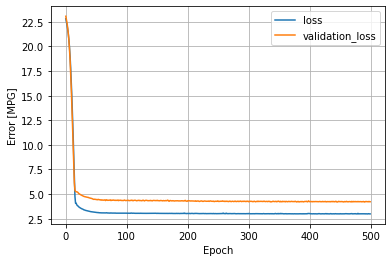

In [143]:
plot_loss(history_horsepower_regression)

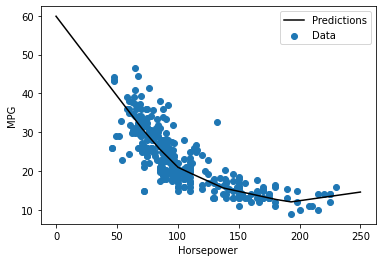

In [144]:
x = tf.linspace(0.0, 250, 251)
y = non_linear_horsepower_regressor.predict(x)
plot_horsepower(x, y)
#We see that introducing non-linearity to our regression model betters the fit!!
test_results['non_linear_horsepower_regressor'] = non_linear_horsepower_regressor.evaluate(test_features['Horsepower'], test_labels, verbose = 0)

In [130]:
#%%time
history_regression = non_linear_regressor.fit(train_features, train_labels, validation_split = 0.2, verbose = 1, epochs = 500)

Epoch 1/500
8/8 [==============================] - 0s 16ms/step - loss: 23.4017 - val_loss: 22.8934
Epoch 2/500
8/8 [==============================] - 0s 3ms/step - loss: 23.1740 - val_loss: 22.3544
Epoch 3/500
8/8 [==============================] - 0s 4ms/step - loss: 21.6336 - val_loss: 21.6723
Epoch 4/500
8/8 [==============================] - 0s 4ms/step - loss: 21.0077 - val_loss: 20.7641
Epoch 5/500
8/8 [==============================] - 0s 3ms/step - loss: 20.5105 - val_loss: 19.5253
Epoch 6/500
8/8 [==============================] - 0s 4ms/step - loss: 18.6709 - val_loss: 17.8715
Epoch 7/500
8/8 [==============================] - 0s 4ms/step - loss: 17.2758 - val_loss: 15.8011
Epoch 8/500
8/8 [==============================] - 0s 4ms/step - loss: 14.9625 - val_loss: 13.6545
Epoch 9/500
8/8 [==============================] - 0s 4ms/step - loss: 13.0935 - val_loss: 11.4440
Epoch 10/500
8/8 [==============================] - 0s 4ms/step - loss: 10.8452 - val_loss: 8.7678
Epoch 11/

8/8 [==============================] - 0s 3ms/step - loss: 1.5409 - val_loss: 2.3631
Epoch 85/500
8/8 [==============================] - 0s 4ms/step - loss: 1.5791 - val_loss: 2.4347
Epoch 86/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5223 - val_loss: 2.3619
Epoch 87/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5226 - val_loss: 2.4025
Epoch 88/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5662 - val_loss: 2.3862
Epoch 89/500
8/8 [==============================] - 0s 4ms/step - loss: 1.6806 - val_loss: 2.3847
Epoch 90/500
8/8 [==============================] - 0s 3ms/step - loss: 1.6937 - val_loss: 2.3927
Epoch 91/500
8/8 [==============================] - 0s 3ms/step - loss: 1.4728 - val_loss: 2.3663
Epoch 92/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5359 - val_loss: 2.3778
Epoch 93/500
8/8 [==============================] - 0s 3ms/step - loss: 1.5414 - val_loss: 2.3751
Epoch 94/500
8/8 [===============

8/8 [==============================] - 0s 4ms/step - loss: 1.5741 - val_loss: 2.3824
Epoch 167/500
8/8 [==============================] - 0s 4ms/step - loss: 1.4556 - val_loss: 2.3749
Epoch 168/500
8/8 [==============================] - 0s 3ms/step - loss: 1.4252 - val_loss: 2.3779
Epoch 169/500
8/8 [==============================] - 0s 4ms/step - loss: 1.3118 - val_loss: 2.3653
Epoch 170/500
8/8 [==============================] - 0s 4ms/step - loss: 1.4153 - val_loss: 2.3569
Epoch 171/500
8/8 [==============================] - 0s 3ms/step - loss: 1.3414 - val_loss: 2.3582
Epoch 172/500
8/8 [==============================] - 0s 4ms/step - loss: 1.4397 - val_loss: 2.3731
Epoch 173/500
8/8 [==============================] - 0s 4ms/step - loss: 1.4235 - val_loss: 2.3327
Epoch 174/500
8/8 [==============================] - 0s 4ms/step - loss: 1.2664 - val_loss: 2.3648
Epoch 175/500
8/8 [==============================] - 0s 4ms/step - loss: 1.3944 - val_loss: 2.3617
Epoch 176/500
8/8 [=====

Epoch 249/500
8/8 [==============================] - 0s 3ms/step - loss: 1.4071 - val_loss: 2.3408
Epoch 250/500
8/8 [==============================] - 0s 3ms/step - loss: 1.3395 - val_loss: 2.3730
Epoch 251/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2871 - val_loss: 2.3427
Epoch 252/500
8/8 [==============================] - 0s 3ms/step - loss: 1.3876 - val_loss: 2.4007
Epoch 253/500
8/8 [==============================] - 0s 3ms/step - loss: 1.3023 - val_loss: 2.3397
Epoch 254/500
8/8 [==============================] - 0s 4ms/step - loss: 1.3238 - val_loss: 2.3411
Epoch 255/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2325 - val_loss: 2.4148
Epoch 256/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1775 - val_loss: 2.3802
Epoch 257/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2935 - val_loss: 2.3570
Epoch 258/500
8/8 [==============================] - 0s 4ms/step - loss: 1.2313 - val_loss: 2.3647
Epoch 259/

8/8 [==============================] - 0s 4ms/step - loss: 1.2608 - val_loss: 2.3966
Epoch 332/500
8/8 [==============================] - 0s 4ms/step - loss: 1.2456 - val_loss: 2.3109
Epoch 333/500
8/8 [==============================] - 0s 4ms/step - loss: 1.2924 - val_loss: 2.3797
Epoch 334/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1734 - val_loss: 2.3604
Epoch 335/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2730 - val_loss: 2.3573
Epoch 336/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2226 - val_loss: 2.3379
Epoch 337/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2136 - val_loss: 2.3491
Epoch 338/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1647 - val_loss: 2.3740
Epoch 339/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1351 - val_loss: 2.3147
Epoch 340/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2109 - val_loss: 2.3682
Epoch 341/500
8/8 [=====

Epoch 414/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0029 - val_loss: 2.3903
Epoch 415/500
8/8 [==============================] - 0s 4ms/step - loss: 1.0278 - val_loss: 2.3430
Epoch 416/500
8/8 [==============================] - 0s 4ms/step - loss: 1.2806 - val_loss: 2.4114
Epoch 417/500
8/8 [==============================] - 0s 3ms/step - loss: 0.9935 - val_loss: 2.3790
Epoch 418/500
8/8 [==============================] - 0s 4ms/step - loss: 1.1241 - val_loss: 2.3593
Epoch 419/500
8/8 [==============================] - 0s 3ms/step - loss: 1.0553 - val_loss: 2.4440
Epoch 420/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1058 - val_loss: 2.3435
Epoch 421/500
8/8 [==============================] - 0s 3ms/step - loss: 1.2818 - val_loss: 2.4207
Epoch 422/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1752 - val_loss: 2.3797
Epoch 423/500
8/8 [==============================] - 0s 4ms/step - loss: 0.9834 - val_loss: 2.4317
Epoch 424/

8/8 [==============================] - 0s 4ms/step - loss: 1.1082 - val_loss: 2.4038
Epoch 497/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1186 - val_loss: 2.3789
Epoch 498/500
8/8 [==============================] - 0s 4ms/step - loss: 1.1792 - val_loss: 2.4524
Epoch 499/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1195 - val_loss: 2.4047
Epoch 500/500
8/8 [==============================] - 0s 3ms/step - loss: 1.1862 - val_loss: 2.4641


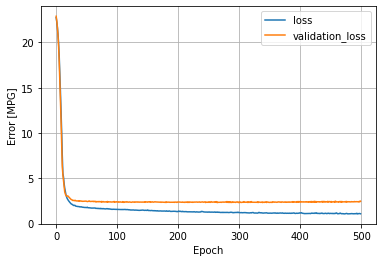

In [138]:
plot_loss(history_regression)
test_results['non_linear_regressor'] = non_linear_regressor.evaluate(test_features, test_labels, verbose = 0)

In [146]:
pd.DataFrame(test_results, index=['Mean absolute error on predicting the MPG']).T

,Mean absolute error on predicting the MPG
horsepower_model,3.615615
linear_model,2.747614
non_linear_horsepower_regressor,3.061307
non_linear_regressor,1.629809
